In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

# set_plt_style("script")

16:45:18 [INFO] utils          -- (+28745ms) -- import logging


16:45:18 [INFO] utils.binaries -- (  +232ms) -- import numpy as np
16:45:19 [INFO] utils.binaries -- (  +527ms) -- import pandas as pd
16:45:19 [INFO] utils.binaries -- (   +42ms) -- import binaries.tools as tool
16:45:20 [INFO] utils.plotting -- (  +915ms) -- import matplotlib.pyplot as plt
16:45:21 [INFO] utils.plotting -- ( +1433ms) -- import seaborn as so
16:45:21 [DBUG] utils.plotting -- (   +32ms) -- font size set to 4
16:45:21 [DBUG] utils.plotting -- (    +4ms) -- figure size set to [2.4, 1.2]
16:45:21 [DBUG] utils.plotting -- (    +2ms) -- plotting style set to `notebook`.
16:45:22 [INFO] utils.plotting -- (   +79ms) -- import plotting.tools as plot


In [2]:
lgE, EJ, Err_up, Err_down = np.loadtxt("auger_icrc2021.txt", unpack=True)                       #   EJ in m^-2 s^-1 sr^-1
EJ *= 1e6 * (3600 * 24 * 365)                                                                   # now in km^-2 yr^-1 sr^-1
Err_up *= 1e6 * (3600 * 24 * 365) * ((10 ** lgE) ** 2) 
Err_down *= 1e6 * (3600 * 24 * 365) * ((10 ** lgE) ** 2)

def process_KCDC(data_path):

    lgE, J, Jerrlow, Jerrhigh, _, _ = np.loadtxt(data_path, unpack = True, delimiter=';')

    # J is in units of m^-2 yr^-1 sr^-1 eV^-1, we need to convert it
    E = 10 ** lgE
    EJ = E * (J * 1e6 * (3600 * 24 * 365))
    EJerrlow = E * (Jerrlow * 1e6 * (3600 * 24 * 365))
    EJerrhigh = E * (Jerrhigh * 1e6 * (3600 * 24 * 365))

    return E, EJ, EJerrlow, EJerrhigh

# def SpectrumICRC2021(E):

#     # data from https://pos.sissa.it/301/486/pdf
#     J0 = EJ[0] / E_true[0] 
#     J0 /= 6.5e3

#     E_ankle = 5.08e18
#     E_s = 3.9e19
#     gamma1 = 3.293
#     gamma2 = 2.53
#     deltaG = 2.5

#     J_below = lambda x: J0 * np.power(x/E_ankle,-gamma1)
#     J_above = lambda x: J0 * np.power(x/E_ankle,-gamma2) * (1 + np.power(E_ankle/E_s, deltaG)) / (1 + np.power(x/E_s, deltaG))

#     return np.piecewise(E, [E < E_ankle, E >= E_ankle], [J_below, J_above])

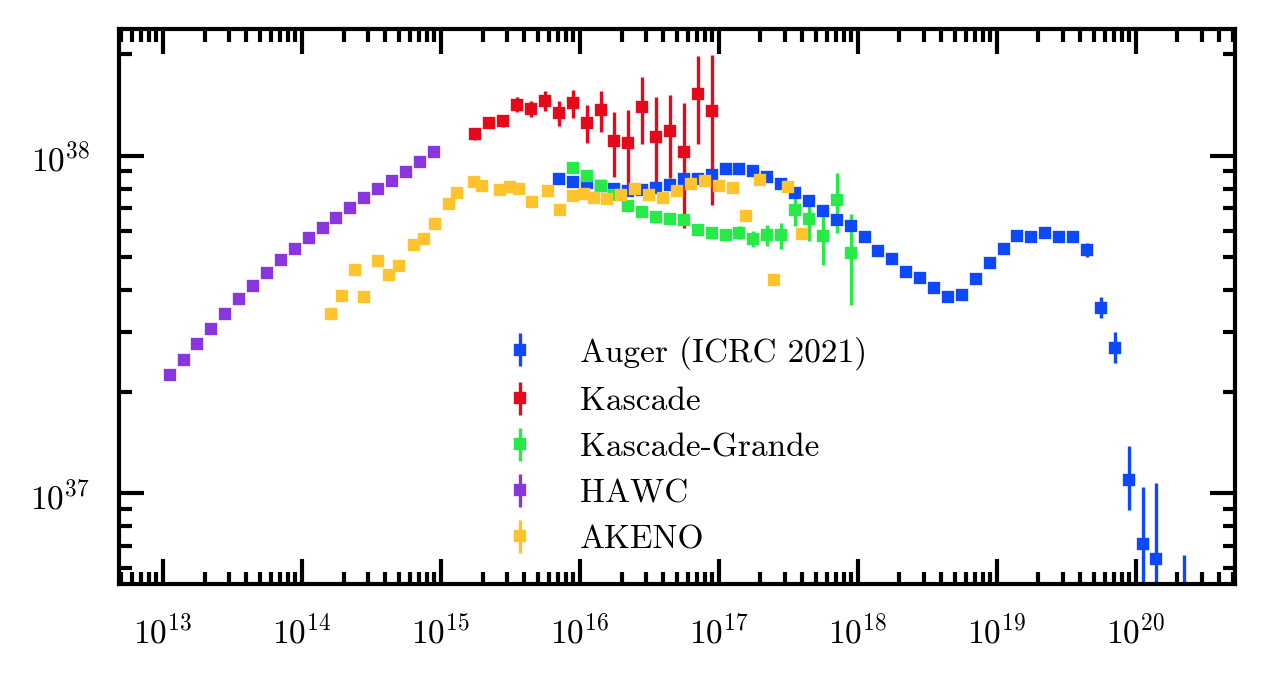

In [23]:
plt.errorbar(10 ** lgE, (10 ** lgE) ** 2 * EJ, yerr=[Err_down, Err_up], fmt="s", markersize=0.5, label="Auger (ICRC 2021)", elinewidth=0.4)

label = ['Kascade', 'Kascade-Grande', 'HAWC', "AKENO"]
for i, dataset in enumerate(['Kascade.txt', 'KascadeGRANDE.txt', 'HAWC.txt', 'AKENO.txt']):
    E_KCDC, EJ_KCDC, low, high = process_KCDC(dataset)

    plt.errorbar(E_KCDC, E_KCDC**2 * EJ_KCDC, yerr=[E_KCDC**2 * low, E_KCDC**2 * high], markersize=0.5, elinewidth=0.4, fmt='s', label=label[i])

# plt.ylabel(r'$E^3J\;$ [$\SI{}{\eV\squared\per\kilo\meter\squared\per\year\per\sr}$]')
# plt.xlabel(r'lg($E$)$\;$ [$\SI{}{\eV}$]')
plt.yscale('log')
plt.xscale('log')
plt.legend()

# ax1 = plt.gca().twiny()
# ax1.set_xscale('log')
# ax1.set_xticks([1, 10, 100, 1000], ['1 TeV', '1 EeV', '1 PeV', '1 ZeV'])

In [8]:
10 ** np.arange(13, 20.1, 1)

array([1.e+13, 1.e+14, 1.e+15, 1.e+16, 1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [14]:
1e3

1000.0